In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")


In [44]:
df = pd.read_csv('train.txt', sep=';', header=None, names=['text', 'emotion'])

In [45]:
df

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [46]:
unique_emotion= df['emotion'].unique()
emotion_number = {}
i = 0
for emo in unique_emotion:
    emotion_number[emo] = i
    i += 1

df['emotion'] = df['emotion'].map(emotion_number)

In [47]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [48]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [49]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [50]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))


df['text'] = df['text'].apply(remove_punctuation)


In [51]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [52]:
def remove_numbers(txt):
    new = ""
    for i in txt:
        if not i.isdigit():
            new += i
    return new

df['text'] = df['text'].apply(remove_numbers)

In [53]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [54]:
def remove_emojis(txt):
    new = ""
    for i in txt:
        if i.isascii():
                new += i
    return new

df['text'] = df['text'].apply(remove_emojis)

In [55]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [56]:
import nltk 

In [57]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
stop_words = set(stopwords.words('english'))


In [59]:
len(stop_words)

198

In [60]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [61]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = ENGLISH_STOP_WORDS

def remove(text):
    words = text.split()
    cleaned = [w for w in words if w.lower() not in stop_words]
    return " ".join(cleaned)

df['text'] = df['text'].apply(remove)


In [62]:
df

,text,emotion
0,didnt feel humiliated,0
1,feeling hopeless damned hopeful just cares awake,0
2,im grabbing minute post feel greedy wrong,1
3,feeling nostalgic fireplace know property,2
4,feeling grouchy,1
...,...,...
15995,just brief time beanbag said anna feel like be...,0
15996,turning feel pathetic waiting tables subbing t...,0
15997,feel strong good overall,5
15998,feel like rude comment im glad t,1


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

document = [
    "i  love pizza",
    "pizza is my favorite food",
    "i could eat pizza every day",
    "pizza is life",
    "pizza pizza pizza"
]

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(document)

print("vocabulary : ", vectorizer.get_feature_names_out())
print("document-term matrix : \n", X.toarray())


vocabulary :  ['could' 'day' 'eat' 'every' 'favorite' 'food' 'is' 'life' 'love' 'my'
 'pizza']
document-term matrix : 
 [[0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 1 1 1 0 0 1 1]
 [1 1 1 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]


In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# take only the text column
texts = df['text']

# vectorize with binary=True
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(texts)

# get feature names
print("Vocabulary size:", len(vectorizer.get_feature_names_out()))

# convert to array
X_array = X.toarray()
print("Shape:", X_array.shape)

# Optional: put into DataFrame for readability
import pandas as pd
X_df = pd.DataFrame(X_array, columns=vectorizer.get_feature_names_out())

# show first 5 rows
print(X_df.head())


Vocabulary size: 14894


MemoryError: Unable to allocate 1.78 GiB for an array with shape (16000, 14894) and data type int64

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- Step 1: Load your dataframe ---
# Assuming df is already loaded with columns: ['text', 'emotion']
# df = pd.read_csv("train.txt", sep=";", header=None, names=["text", "emotion"])

# --- Step 2: Vectorization ---
texts = df['text']
labels = df['emotion']

vectorizer = CountVectorizer(binary=True, ngram_range=(2,2))
X = vectorizer.fit_transform(texts)

print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("Shape:", X.shape)

# Only convert the first 5 rows to a dense DataFrame for inspection
X_df_sample = pd.DataFrame(X[:5].toarray(), columns=vectorizer.get_feature_names_out())

# show first 5 rows
print(X_df_sample.head(1))

# --- Step 3: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- Step 4: Train Classifier ---
clf = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)

# --- Step 5: Evaluate ---
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Vocabulary size: 85349
Shape: (16000, 85349)
   aa force  aa meeting  aaaaand tis  aaaand stealing  aac feeling  \
0         0           0            0                0            0   

   aahhh work  aaron friends  abandon project  abandon sake  abandoned ask  \
0           0              0                0             0              0   

   ...  zooming aretha  zooming right  zooms faults  zq jcho  \
0  ...               0              0             0        0   

   zucchini allowed  zum eintrag  zumba class  zumba half  zumba lame  zz logo  
0                 0            0            0           0           0        0  

[1 rows x 85349 columns]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7065625

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       933
           1       0.91      0.56      0.69       432
           2       0.91      0.26      0.41       261
           3       0.90      0.31      0.46       115
           4       0.89      0.58      0.70       387
           5       0.61      0.91      0.73      1072

    accuracy                           0.71      3200
   macro avg       0.83      0.57      0.63      3200
weighted avg       0.76      0.71      0.69      3200



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

document = [
    "i  love pizza",
    "pizza is my favorite food",
    "i could eat pizza every day",
    "pizza is life",
    "pizza pizza pizza"
]

vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(document)

print("vocabulary : ", vectorizer.get_feature_names_out())
print("document-term matrix : \n", X.toarray())

vocabulary :  ['could eat' 'eat pizza' 'every day' 'favorite food' 'is life' 'is my'
 'love pizza' 'my favorite' 'pizza every' 'pizza is' 'pizza pizza']
document-term matrix : 
 [[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 1 0]
 [1 1 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 2]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

document = [
    "i  love pizza",
    "pizza is my favorite food",
    "i could eat pizza every day",
    "pizza is life",
    "pizza pizza pizza"
]

# First, extract bigram counts
vectorizer = CountVectorizer(ngram_range=(2,2))
X_counts = vectorizer.fit_transform(document)

# Then, transform counts to tf-idf
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

print("vocabulary : ", vectorizer.get_feature_names_out())
print("document-term matrix : \n", X_tfidf.toarray())

vocabulary :  ['could eat' 'eat pizza' 'every day' 'favorite food' 'is life' 'is my'
 'love pizza' 'my favorite' 'pizza every' 'pizza is' 'pizza pizza']
document-term matrix : 
 [[0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.52335825 0.         0.52335825
  0.         0.52335825 0.         0.42224214 0.        ]
 [0.5        0.5        0.5        0.         0.         0.
  0.         0.         0.5        0.         0.        ]
 [0.         0.         0.         0.         0.77828292 0.
  0.         0.         0.         0.62791376 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.        ]]


Vocabulary size: 85349
Shape: (16000, 85349)
   aa force  aa meeting  aaaaand tis  aaaand stealing  aac feeling  \
0       0.0         0.0          0.0              0.0          0.0   

   aahhh work  aaron friends  abandon project  abandon sake  abandoned ask  \
0         0.0            0.0              0.0           0.0            0.0   

   ...  zooming aretha  zooming right  zooms faults  zq jcho  \
0  ...             0.0            0.0           0.0      0.0   

   zucchini allowed  zum eintrag  zumba class  zumba half  zumba lame  zz logo  
0               0.0          0.0          0.0         0.0         0.0      0.0  

[1 rows x 85349 columns]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6259375

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       933
           1       0.94      0.32      0.47       432
           2       1.00      0.10      0.19       261
           3       0.82      0.08      0.14       115
           4       0.90      0.35      0.51       387
           5       0.51      0.96      0.67      1072

    accuracy                           0.63      3200
   macro avg       0.83      0.42      0.45      3200
weighted avg       0.75      0.63      0.59      3200

Predictions saved to tfidf_predictions.csv


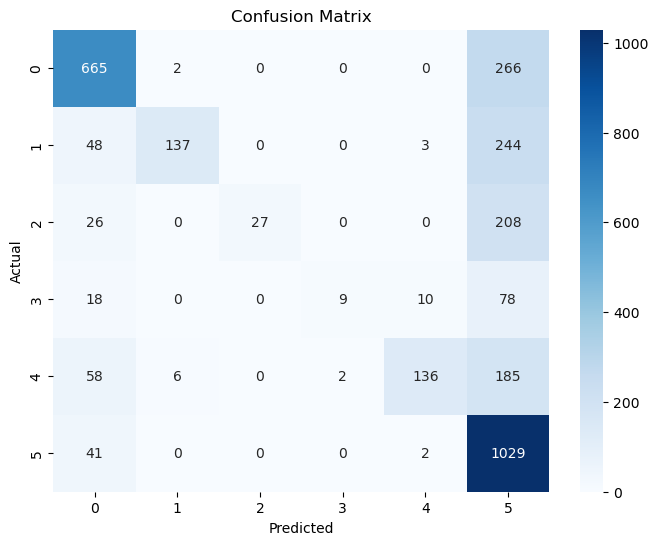

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Load your dataframe ---
# Assuming df is already loaded with columns: ['text', 'emotion']
# df = pd.read_csv("train.txt", sep=";", header=None, names=["text", "emotion"])

# --- Step 2: Vectorization ---
texts = df['text']
labels = df['emotion']

# Use TF-IDF with bigrams
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(texts)

print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("Shape:", X.shape)

# Only convert the first 5 rows to a dense DataFrame for inspection
X_df_sample = pd.DataFrame(X[:5].toarray(), columns=vectorizer.get_feature_names_out())
print(X_df_sample.head(1))

# --- Step 3: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.20, random_state=42, stratify=labels
)

# --- Step 4: Train Classifier ---
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)

# --- Step 5: Evaluate ---
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 6: Save predictions ---
results = pd.DataFrame({
    "Text": df.loc[y_test.index, "text"].values,
    "Actual": y_test.values,
    "Predicted": y_pred
})
results.to_csv("tfidf_predictions.csv", index=False)
print("Predictions saved to tfidf_predictions.csv")

# --- Step 7: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Vocabulary size: 85349
Shape: (16000, 85349)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6259375

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       933
           1       0.94      0.32      0.47       432
           2       1.00      0.10      0.19       261
           3       0.82      0.08      0.14       115
           4       0.90      0.35      0.51       387
           5       0.51      0.96      0.67      1072

    accuracy                           0.63      3200
   macro avg       0.83      0.42      0.45      3200
weighted avg       0.75      0.63      0.59      3200

Predictions with percentages saved to tfidf_predictions_with_proba.csv


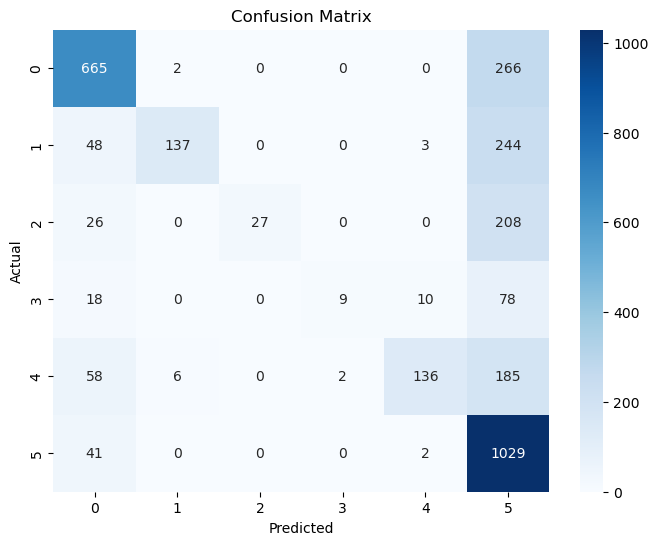

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Load your dataframe ---
# Assuming df is already loaded with columns: ['text', 'emotion']
# df = pd.read_csv("train.txt", sep=";", header=None, names=["text", "emotion"])

# --- Step 2: Vectorization ---
texts = df['text']
labels = df['emotion']

# Use TF-IDF with bigrams
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(texts)

print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("Shape:", X.shape)

# --- Step 3: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.20, random_state=42, stratify=labels
)

# --- Step 4: Train Classifier ---
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)

# --- Step 5: Evaluate ---
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)   # probabilities

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 6: Save predictions with percentages ---
proba_df = pd.DataFrame(y_pred_proba, columns=[f"Prob_{cls}" for cls in clf.classes_])
proba_df = proba_df.multiply(100)  # convert to percentages

results = pd.DataFrame({
    "Text": df.loc[y_test.index, "text"].values,
    "Actual": y_test.values,
    "Predicted": y_pred
}).reset_index(drop=True)

# Concatenate text + actual + predicted + probabilities
final_results = pd.concat([results, proba_df], axis=1)

# Save to CSV
final_results.to_csv("tfidf_predictions_with_proba.csv", index=False)
print("Predictions with percentages saved to tfidf_predictions_with_proba.csv")

# --- Step 7: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
